Selected Features: Index(['Age', 'biological_sex_Male', 'infancy_vac_wP', 'IgG-PT-D0-titer',
       'actual_boost_day_on_D0', 'ethnicity_Not Hispanic or Latino'],
      dtype='object')
Coefficients: [ 3.89701633 28.46800009 18.27266108 19.02994484  2.18631639  0.
 11.18778041  0.          0.          0.          0.          0.        ]


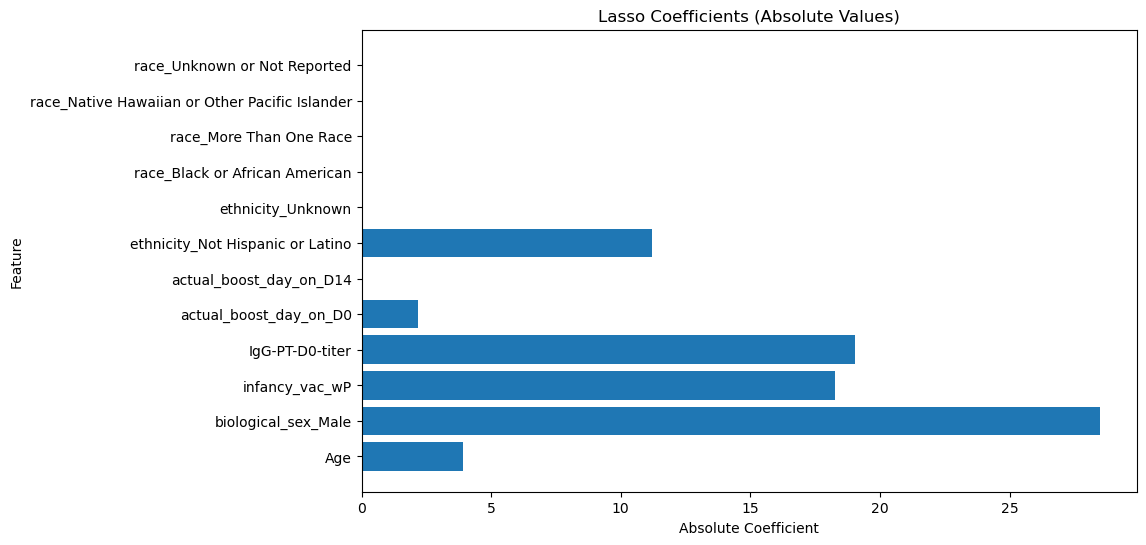

Selected Features: Index(['Age', 'biological_sex_Male', 'infancy_vac_wP', 'IgG-PT-D0-titer',
       'actual_boost_day_on_D0', 'ethnicity_Not Hispanic or Latino',
       'race_Black or African American', 'race_More Than One Race',
       'race_Unknown or Not Reported'],
      dtype='object')
Feature Importances: [1.42299588e-01 7.06296921e-02 1.07766256e-01 4.10129928e-01
 6.44730387e-02 6.42260836e-03 1.09504153e-01 4.57377234e-03
 1.65895306e-02 3.38594672e-02 1.88031685e-04 3.35639344e-02]


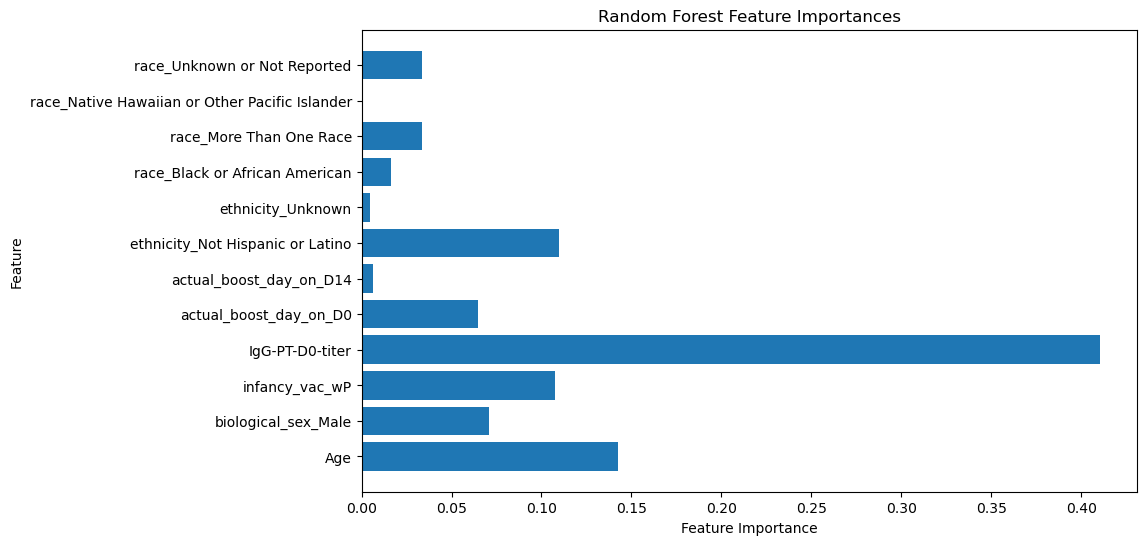

Random Forest - Best Parameters: {'n_estimators': 400, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_depth': 22}
Random Forest - R-squared on Test Set: 0.1793229538391261
Linear Regression - R-squared on Test Set: 0.09297722929188279
SVR - Best Parameters: {'kernel': 'linear', 'C': 15}
SVR - R-squared on Test Set: 0.013091749721257706
Gradient Boosting - Best Parameters: {'n_estimators': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 2, 'learning_rate': 0.01}
Gradient Boosting - R-squared on Test Set: 0.0819158172398583
Lasso - Best Parameters: {'alpha': 0.01}
Lasso - R-squared on Test Set: 0.09066837095930647
Ridge - Best Parameters: {'alpha': 0.1}
Ridge - R-squared on Test Set: 0.10781510263952843
ElasticNet - Best Parameters: {'l1_ratio': 0.7, 'alpha': 0.01}
ElasticNet - R-squared on Test Set: 0.0913356302604964
Decision Tree - Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': None}
Decision Tree - R-squared on Test Set: -0.00240

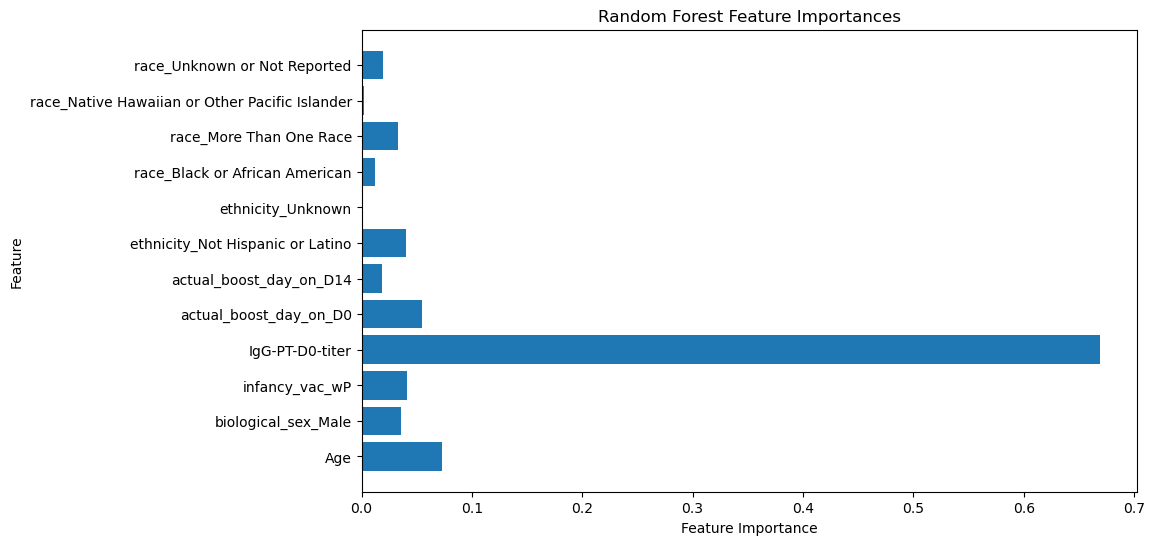

Random Forest - Best Parameters: {'n_estimators': 400, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_depth': 22}
Random Forest - R-squared on Test Set: 0.45237646768303963
Linear Regression - R-squared on Test Set: 0.17844924423435993
SVR - Best Parameters: {'kernel': 'rbf', 'C': 5}
SVR - R-squared on Test Set: 0.3432193295129362
Gradient Boosting - Best Parameters: {'n_estimators': 40, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 2, 'learning_rate': 0.01}
Gradient Boosting - R-squared on Test Set: 0.28161762559713466
Lasso - Best Parameters: {'alpha': 0.01}
Lasso - R-squared on Test Set: 0.3127059574171114
Ridge - Best Parameters: {'alpha': 0.1}
Ridge - R-squared on Test Set: 0.3488786378309454
ElasticNet - Best Parameters: {'l1_ratio': 0.7, 'alpha': 0.01}
ElasticNet - R-squared on Test Set: 0.39558761044326496
Decision Tree - Best Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 20}
Decision Tree - R-squared on Test Set: 0.459063793899

In [1]:
import sys
sys.path.append('/Downloads')  
import Task1_peng_finish 


In [12]:
import dash
from dash import html, dcc
import plotly.express as px
import dash_table
import Task1_peng_finish as tpf  
import pandas as pd 

def generate_age_distribution(df):
    fig = px.histogram(df, x='Age', nbins=20, title="Age Distribution")
    return fig

def generate_sex_distribution(df):
    sex_distribution = df['biological_sex_Male'].map({1.0: 'Male', 0.0: 'Female'})
    fig = px.pie(names=sex_distribution, title="Sex Distribution")
    return fig

def generate_lasso_coefficients_plot(X_columns, coefficients):
    df = pd.DataFrame({
        'Feature': X_columns,
        'Absolute Coefficient': abs(coefficients)
    }).sort_values(by='Absolute Coefficient')

    fig = px.bar(df, y='Feature', x='Absolute Coefficient', orientation='h',
                 title='Lasso Coefficients (Absolute Values)')
    return fig

def generate_rf_feature_importances_plot(X_columns, importances):
    df = pd.DataFrame({
        'Feature': X_columns,
        'Feature Importance': importances
    }).sort_values(by='Feature Importance')

    fig = px.bar(df, y='Feature', x='Feature Importance', orientation='h',
                 title='Random Forest Feature Importances')
    return fig


def generate_model_evaluation_chart(r2_dict):
    models = list(r2_dict.keys())
    scores = list(r2_dict.values())
    fig = px.bar(x=models, y=scores, labels={'x': 'Model', 'y': 'R-squared'}, title="Model Evaluation R-squared")
    return fig

titer_df = pd.read_csv('titer.csv')

titer_df_filtered = titer_df[(titer_df['isotype'] == 'IgG') & (titer_df['antigen'] == 'PT') & (titer_df['is_antigen_specific'] == True)]

def generate_immunogenicity_plot(df):
    df_filtered = df[(df['actual_day_relative_to_boost'] >= df['actual_day_relative_to_boost'].min()) & 
                     (df['actual_day_relative_to_boost'] <= 150)]
    
    fig = px.line(
        df_filtered,
        x='actual_day_relative_to_boost',
        y='MFI_normalised',
        color='infancy_vac',
        line_group='subject_id',
        markers=True,
        title='Immunogenicity Over Time'
    )
    
    fig.update_xaxes(range=[df_filtered['actual_day_relative_to_boost'].min(), 150])

    fig.add_vline(x=0, line=dict(color="black", dash="dash"))
    fig.add_vline(x=14, line=dict(color="black", dash="dash"))

    fig.update_layout(
        xaxis_title="Actual Day Relative to Boost",
        yaxis_title="MFI Normalised",
        template="simple_white",
        legend_title_text='Infancy Vaccine'
    )
    return fig

df_model_evaluation = pd.read_csv('model_evaluation_task11.csv')
df_r2_scores = pd.read_csv('model_r2_scores.csv')

def generate_bar_graph(df, cols, title):
    melted_df = df.melt(id_vars=["Task"], value_vars=cols, var_name="Metric", value_name="Score")
    fig = px.bar(
        melted_df,
        x='Task',
        y='Score',
        color='Metric',
        barmode='group',
        title=title
    )
    return dcc.Graph(figure=fig)


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Immune Responses to Vaccination Dashboard"),
    
    html.Div([
        html.Div([
            dcc.Graph(
                figure=generate_age_distribution(tpf.df_train).update_layout(template='xgridoff')
            )
        ], style={'display': 'inline-block', 'width': '50%'}),
        
        html.Div([
            dcc.Graph(
                figure=generate_sex_distribution(tpf.df_train).update_layout(template='ggplot2')
            )
        ], style={'display': 'inline-block', 'width': '50%'})
    ], style={'width': '100%', 'display': 'flex'}),
    
    html.Div([
        html.Div([
            dcc.Graph(
                figure=generate_lasso_coefficients_plot(tpf.X_train_scaled.columns, tpf.lasso_coefficients).update_layout(template='seaborn')
            )
        ], style={'display': 'inline-block', 'width': '50%'}),
        
        html.Div([
            dcc.Graph(
                figure=generate_rf_feature_importances_plot(tpf.X_train_scaled.columns, tpf.feature_importances).update_layout(template='simple_white')
            )
        ], style={'display': 'inline-block', 'width': '50%'})
    ], style={'width': '100%', 'display': 'flex'}),
    
    html.Div([
        html.Div([
            dcc.Graph(
                figure=generate_model_evaluation_chart(tpf.r2_dict).update_layout(template='xgridoff')
            )
        ], style={'display': 'inline-block', 'width': '50%'}),
        
        html.Div([
            dcc.Graph(
                figure=generate_immunogenicity_plot(titer_df_filtered).update_layout(template='presentation')
            )
        ], style={'display': 'inline-block', 'width': '50%'})
    ], style={'width': '100%', 'display': 'flex'}),
    
    generate_bar_graph(df_r2_scores, ["1.1", "1.2"], "Comparison of 1.1 and 1.2 Metrics"),
    
    generate_bar_graph(df_r2_scores, ["2.1", "2.2"], "Comparison of 2.1 and 2.2 Metrics"),

    generate_bar_graph(df_r2_scores, ["3.1", "3.2"], "Comparison of 3.1 and 3.2 Metrics"), 
    
    html.H2('Task 1 Data Table'),
    dash_table.DataTable(
        id='table',
        columns=[{"name": i, "id": i} for i in tpf.df_task1.columns],
        data=tpf.df_task1.to_dict('records'),
        style_table={'height': '300px', 'overflowY': 'auto'},
        page_size=10, 
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

